## Order of recursive calls

Link: https://www.youtube.com/watch?v=VYYkJ1OLXBw&index=2&list=PL6BsET-8jgYU8PiPQm_9Ov9gkAWIab25Z

In [1]:
def cascade(n):
    if n < 10:
        print(n)
    else:
        print(n)
        cascade(n//10)
        print(n)
        
cascade(12345)

12345
1234
123
12
1
12
123
1234
12345


In [2]:
cascade(54321)

54321
5432
543
54
5
54
543
5432
54321


Each nested call to cascade has to complete before it's parent call will continue. 

* Each cascade frame is from a different call to cascade.
* Until the Return value appears, that call has not completed.
* Any statement can appear before or after the recursive call.

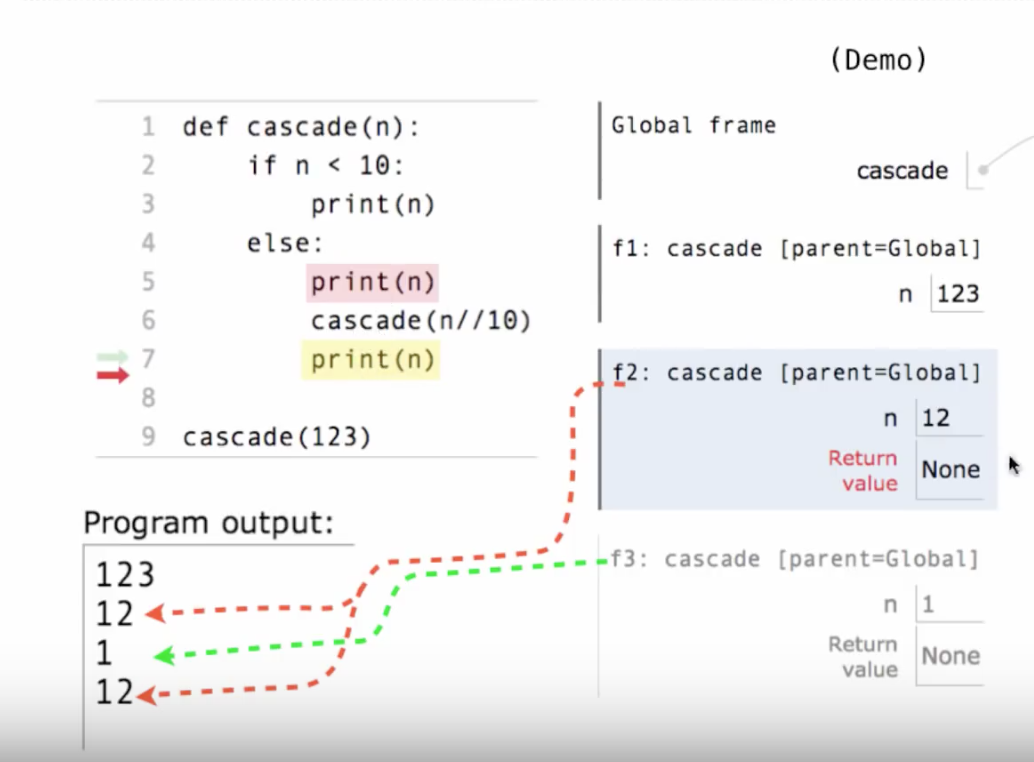

A simpler version of cascade might look like:

In [3]:
def cascade(n):
    print(n)
    if n >= 10:
        cascade(n//10)
        print(n)
        

* If two implementations are equally clear, then shorter is usually better
* In this case, the longer implementation is clearer (at least to the lecturer)
* When learning to write recursive functions, put the base cases first.
* Both are recursive functions, even though only the first has typical structure

## Inverse Cascade

Write a function that prints an inverse cascade:

```
1
12
123
1234
123
12
1
```

Use the following structure:

In [5]:
def inverse_cascade(n):
    grow(n)
    print(n)
    shrink(n)
    
def f_then_g(f, g, n):
    if n:
        f(n)
        g(n)
        

Complete the lambda functions grow and shrink:

In [6]:
grow = lambda n: f_then_g(grow, print, n // 10)
shrink = lambda n: f_then_g(print, shrink, n // 10)

In [7]:
inverse_cascade(12345)

1
12
123
1234
12345
1234
123
12
1


## Tree Recursion

Tree-shaped processes arise whenver executing the body of a recursive function makes more than one call to that function.

E.g. Fibonacci
```
n:      0, 1, 2, 3, 4, 5, 6, 7,  8
fib(n): 0, 1, 1, 2, 3, 5, 8, 13, 21,
```

In [9]:
def fib(n):
    if n == 0:
        return 0
    elif n == 1:
        return 1
    else:
        return fib(n-2) + fib(n-1)
    

Since there is more than one recursive call to `fib` the computation process of fib evolves into a tree structure.
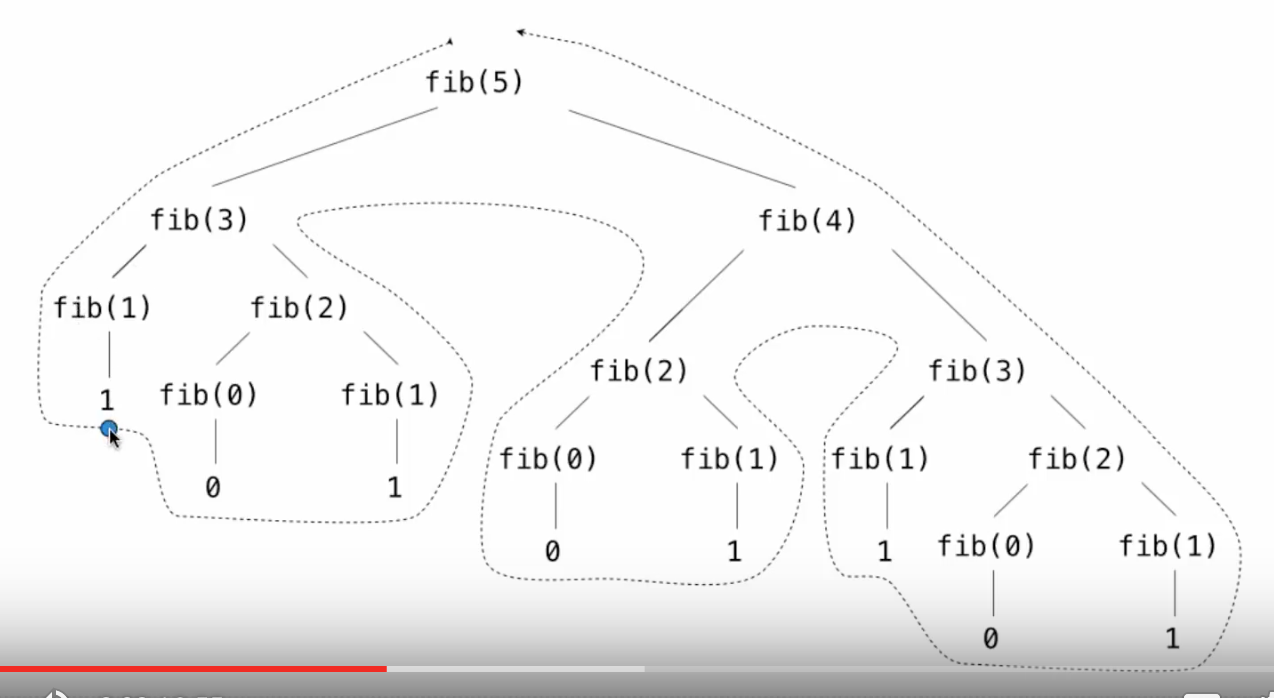

In [10]:
fib(20)

6765

In [11]:
fib(35)

9227465

Woo, that took a while ^^

In [15]:
# from ucb import trace
# @trace
def fib(n):
    if n == 0:
        return 0
    elif n == 1:
        return 1
    else:
        return fib(n-2) + fib(n-1)
    

The above code would import:

https://inst.eecs.berkeley.edu/~cs61a/fa11/projects/pig/ucb.py.html

And return output like:

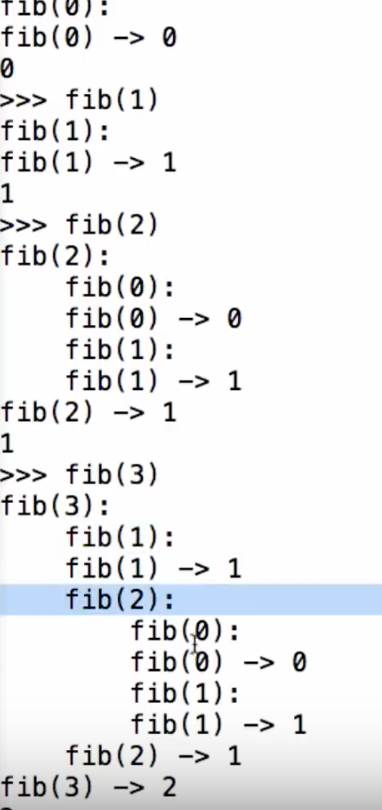

`@trace` is a decorator which takes `fib` and wraps it in a higher order function to output whenever the fib function is called

## Example: Counting Partitions

The number of partitions of a positive integer n, using parts up to size m, is the number of ways in which n can be expressed as the sum of positive integers parts up to m in increasing order.

```
2 + 4 = 6
1 + 1 + 4 = 6
3 + 3 = 6
1 + 2 + 3 = 6
1 + 1 + 1 + 3 = 6
2 + 2 + 2 = 6
1 + 1 + 2 + 2 = 6
1 + 1 + 1 + 1 + 2 = 6
1 + 1 + 1 + 1 + 1 + 1 = 6
```
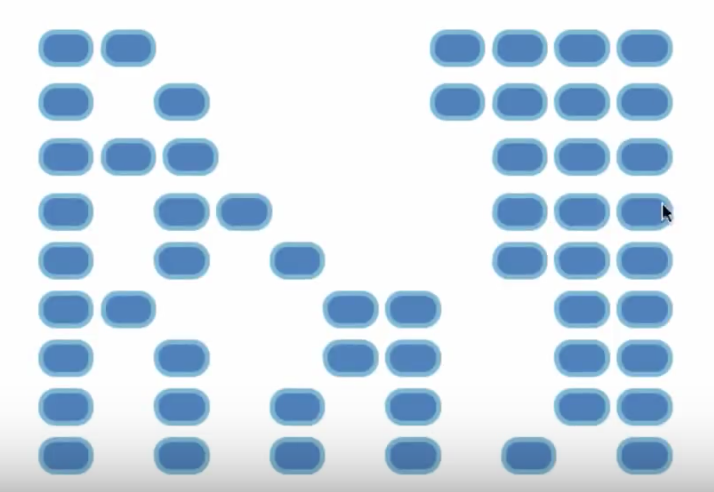

* Recursive decomposition: finding simpler instances of the problem.
* Explore two possibilities:
 * Use at least one 4
 * Don't use any 4
* Solve two simpler problems:
 * count_partitions(2, 4)
 * count_partitions(6, 3) 
* Tree recursion often involves exploring two different choices.

In [18]:
def count_partitions(n, m):
    if n == 0:
        return 1
    elif n < 0:
        return 0
    elif m == 0:
        return 0
    else:
        with_m = count_partitions(n-m, m)
        without_m = count_partitions(n, m-1)
        return with_m + without_m
    
count_partitions(5, 3)

5